In [ ]:
#pip install pandas

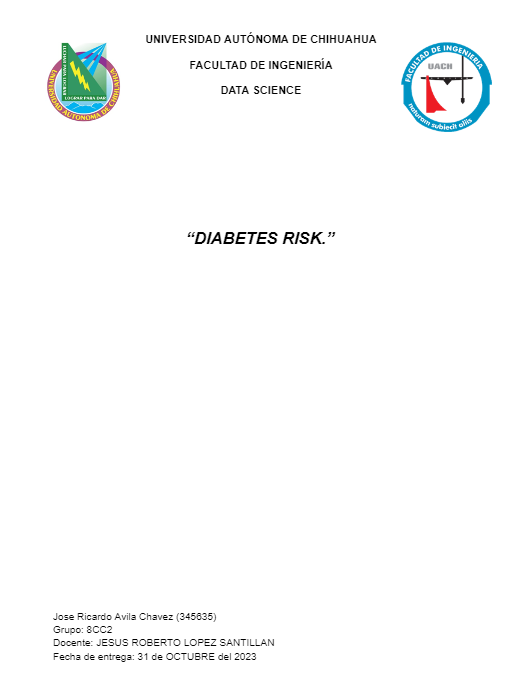

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


In [ ]:
# Cargar el conjunto de datos desde la URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv"
df = pd.read_csv(url)

In [ ]:
fila_a_imprimir = df.iloc[0]

# Imprime la fila en la consola
print(fila_a_imprimir)


Age                         40
Gender                    Male
Polyuria                    No
Polydipsia                 Yes
sudden weight loss          No
weakness                   Yes
Polyphagia                  No
Genital thrush              No
visual blurring             No
Itching                    Yes
Irritability                No
delayed healing            Yes
partial paresis             No
muscle stiffness           Yes
Alopecia                   Yes
Obesity                    Yes
class                 Positive
Name: 0, dtype: object


In [ ]:
X = df.drop("class", axis=1)
y = df["class"]

In [ ]:
# Crear una instancia de StratifiedShuffleSplit
split = StratifiedShuffleSplit(train_size=0.8, test_size=0.2, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba utilizando StratifiedShuffleSplit
for train_index, test_index in split.split(df, df['class']):
    train_df = df.loc[train_index]
    test_df = df.loc[test_index]



Tamaño del conjunto de entrenamiento: 416 muestras
Tamaño del conjunto de prueba: 104 muestras


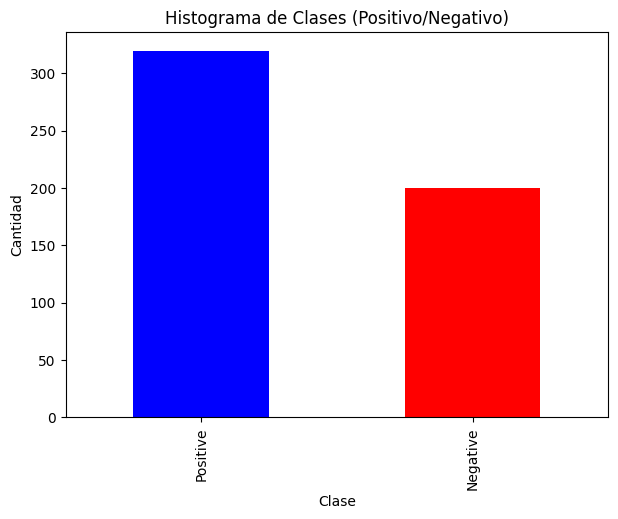

El DataFrame tiene 520 instancias (muestras).


In [ ]:
# Tamaño de los conjuntos de entrenamiento y prueba
print(f"Tamaño del conjunto de entrenamiento: {len(train_df)} muestras")
print(f"Tamaño del conjunto de prueba: {len(test_df)} muestras")

# Crear un histograma basado en la columna que indica Positivo y Negativo
plt.figure(figsize=(7, 5))
df['class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Histograma de Clases (Positivo/Negativo)')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

# Obtener el número de instancias en el DataFrame
num_instancias = df.shape[0]
print(f"El DataFrame tiene {num_instancias} instancias (muestras).")


In [ ]:
split.get_n_splits(X, y) # Numero total de splits

10

In [ ]:
# Splits y los indices de cada train y test por split
"""
for i, (train_index, test_index) in enumerate(split.split(X, y)):
     print(f"Fold {i}:")
     print(f"  Train: index={train_index}")
     print(f"  Test:  index={test_index}")
"""

'\nfor i, (train_index, test_index) in enumerate(split.split(X, y)):\n     print(f"Fold {i}:")\n     print(f"  Train: index={train_index}")\n     print(f"  Test:  index={test_index}")\n'

In [ ]:
categorical_columns = [col for col in train_df.columns if col != "class"]

# Crear un ColumnTransformer para aplicar One-Hot Encoding a las columnas categóricas
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)])

svc_model = SVC()
rf_model = RandomForestClassifier(random_state=42)
et_model = ExtraTreesClassifier(random_state=42)

# Crear pipelines para aplicar el preprocesamiento y luego entrenar los modelos
svc_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', svc_model)])
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', rf_model)])
et_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', et_model)])

# Entrenar los modelos en el conjunto de entrenamiento
svc_pipeline.fit(train_df.drop("class", axis=1), train_df["class"])
rf_pipeline.fit(train_df.drop("class", axis=1), train_df["class"])
et_pipeline.fit(train_df.drop("class", axis=1), train_df["class"])



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Age', 'Gender', 'Polyuria',
                                                   'Polydipsia',
                                                   'sudden weight loss',
                                                   'weakness', 'Polyphagia',
                                                   'Genital thrush',
                                                   'visual blurring', 'Itching',
                                                   'Irritability',
                                                   'delayed healing',
                                                   'partial paresis',
                                                   'muscle stiffness',
                                                   'Alopecia', 'Obesity'])])),
                ('model', ExtraTreesClassifier(random_state=42))])

In [ ]:
# Grid search para evaluar los hiperparametros de los 3 modelos
svc_param_grid = {'model__C': [0.1, 1, 10],
                  'model__kernel': ['linear', 'rbf']}
rf_param_grid = {'model__n_estimators': [100, 200, 300],
                 'model__max_depth': [None, 10, 20]}
et_param_grid = {'model__n_estimators': [100, 200, 300],
                 'model__max_depth': [None, 10, 20]}
# Grid search para SVC
svc_grid = GridSearchCV(svc_pipeline, svc_param_grid, cv=5, scoring='accuracy')
svc_grid.fit(train_df.drop("class", axis=1), train_df["class"])

# Grid search para Random Forest
rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy')
rf_grid.fit(train_df.drop("class", axis=1), train_df["class"])

# Grid search para Extra Trees
et_grid = GridSearchCV(et_pipeline, et_param_grid, cv=5, scoring='accuracy')
et_grid.fit(train_df.drop("class", axis=1), train_df["class"])

# Mejores hiperparámetros para cada uno
print("Mejores hiperparámetros para SVC:", svc_grid.best_params_)
print("Mejores hiperparámetros para Random Forest:", rf_grid.best_params_)
print("Mejores hiperparámetros para Extra Trees:", et_grid.best_params_)




Mejores hiperparámetros para SVC: {'model__C': 10, 'model__kernel': 'rbf'}
Mejores hiperparámetros para Random Forest: {'model__max_depth': None, 'model__n_estimators': 200}
Mejores hiperparámetros para Extra Trees: {'model__max_depth': None, 'model__n_estimators': 300}


In [ ]:
# Evaluar los meojres hiperparametros
svc_best_model = svc_grid.best_estimator_
rf_best_model = rf_grid.best_estimator_
et_best_model = et_grid.best_estimator_

svc_predictions = svc_best_model.predict(test_df.drop("class", axis=1))
rf_predictions = rf_best_model.predict(test_df.drop("class", axis=1))
et_predictions = et_best_model.predict(test_df.drop("class", axis=1))

svc_accuracy = accuracy_score(test_df["class"], svc_predictions)
rf_accuracy = accuracy_score(test_df["class"], rf_predictions)
et_accuracy = accuracy_score(test_df["class"], et_predictions)

print("\nPrecisión de SVC (mejor modelo):", svc_accuracy)
print("Precisión de Random Forest (mejor modelo):", rf_accuracy)
print("Precisión de Extra Trees (mejor modelo):", et_accuracy)



Precisión de SVC (mejor modelo): 0.9903846153846154
Precisión de Random Forest (mejor modelo): 0.9807692307692307
Precisión de Extra Trees (mejor modelo): 0.9807692307692307


In [ ]:
# Nuevo pipeline con el mejor modelo y sus mejores parametros

svc_best_pipeline = make_pipeline(
    preprocessor,
    SVC(C=svc_grid.best_params_['model__C'], kernel=svc_grid.best_params_['model__kernel'])
)

# Entrenar el mejor modelo SVC en el conjunto de entrenamiento
svc_best_pipeline.fit(train_df.drop("class", axis=1), train_df["class"])

# Realizar predicciones en el conjunto de prueba
svc_best_predictions = svc_best_pipeline.predict(test_df.drop("class", axis=1))

# Calcular la precisión del mejor modelo SVC en el conjunto de prueba
svc_best_accuracy = accuracy_score(test_df["class"], svc_best_predictions)

print("Precisión del mejor modelo SVC:", svc_best_accuracy)


Precisión del mejor modelo SVC: 0.9903846153846154


In [ ]:

# Realizar cross val score con el mejor modelo SVC
svc_scores = cross_val_score(svc_best_pipeline, train_df.drop("class", axis=1), train_df["class"], cv=5, scoring="accuracy")
svc_mean_accuracy = svc_scores.mean()

# Realizar cross val score con Random Forest (mejor modelo)
rf_scores = cross_val_score(rf_best_model, train_df.drop("class", axis=1), train_df["class"], cv=5, scoring="accuracy")
rf_mean_accuracy = rf_scores.mean()

# Realizar cross val score con Extra Trees (mejor modelo)
et_scores = cross_val_score(et_best_model, train_df.drop("class", axis=1), train_df["class"], cv=5, scoring="accuracy")
et_mean_accuracy = et_scores.mean()

print("Precisión promedio de SVC (mejor modelo) en validación cruzada:", svc_mean_accuracy)
print("Precisión promedio de Random Forest (mejor modelo) en validación cruzada:", rf_mean_accuracy)
print("Precisión promedio de Extra Trees (mejor modelo) en validación cruzada:", et_mean_accuracy)


Precisión promedio de SVC (mejor modelo) en validación cruzada: 0.9616179001721171
Precisión promedio de Random Forest (mejor modelo) en validación cruzada: 0.9688181296615032
Precisión promedio de Extra Trees (mejor modelo) en validación cruzada: 0.9808663224325874


In [ ]:
# Imprimir la matriz de confusión y el informe de clasificación para SVC
svc_confusion = confusion_matrix(test_df["class"], svc_best_predictions)
svc_report = classification_report(test_df["class"], svc_best_predictions, target_names=test_df["class"].unique())

print("Matriz de Confusión - SVC:")
print(svc_confusion)
print("\nInforme de Clasificación - SVC:")
print(svc_report)

# Imprimir la matriz de confusión y el informe de clasificación para Random Forest
rf_confusion = confusion_matrix(test_df["class"], rf_predictions)
rf_report = classification_report(test_df["class"], rf_predictions, target_names=test_df["class"].unique())

print("\nMatriz de Confusión - Random Forest:")
print(rf_confusion)
print("\nInforme de Clasificación - Random Forest:")
print(rf_report)

# Imprimir la matriz de confusión y el informe de clasificación para Extra Trees
et_confusion = confusion_matrix(test_df["class"], et_predictions)
et_report = classification_report(test_df["class"], et_predictions, target_names=test_df["class"].unique())

print("\nMatriz de Confusión - Extra Trees:")
print(et_confusion)
print("\nInforme de Clasificación - Extra Trees:")
print(et_report)

Matriz de Confusión - SVC:
[[40  0]
 [ 1 63]]

Informe de Clasificación - SVC:
              precision    recall  f1-score   support

    Positive       0.98      1.00      0.99        40
    Negative       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104


Matriz de Confusión - Random Forest:
[[40  0]
 [ 2 62]]

Informe de Clasificación - Random Forest:
              precision    recall  f1-score   support

    Positive       0.95      1.00      0.98        40
    Negative       1.00      0.97      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104


Matriz de Confusión - Extra Trees:
[[40  0]
 [ 2 62]]

Informe de Clasificación - Extra Trees:
              precision    recall  f1-score   support

    Positive    

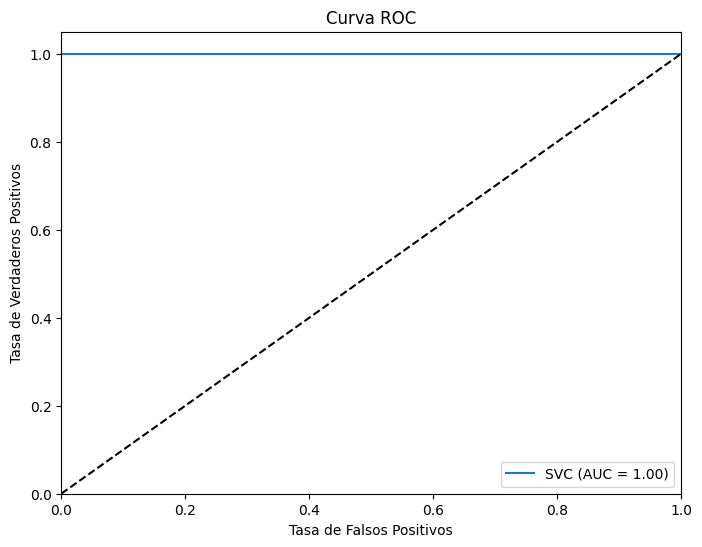

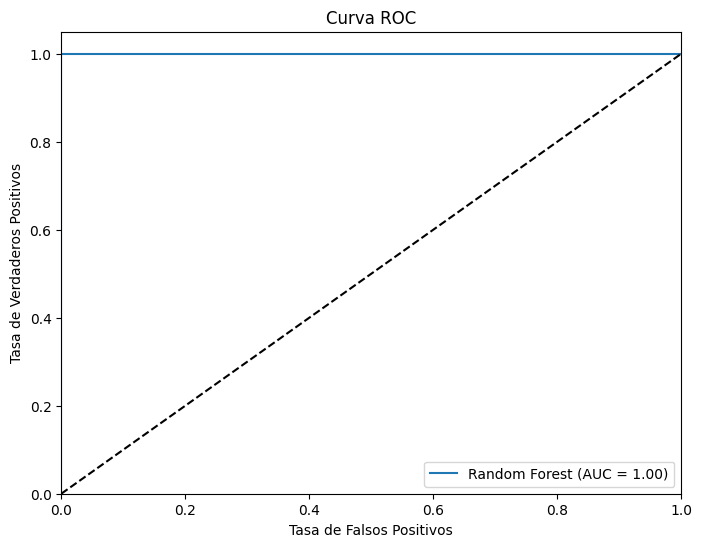

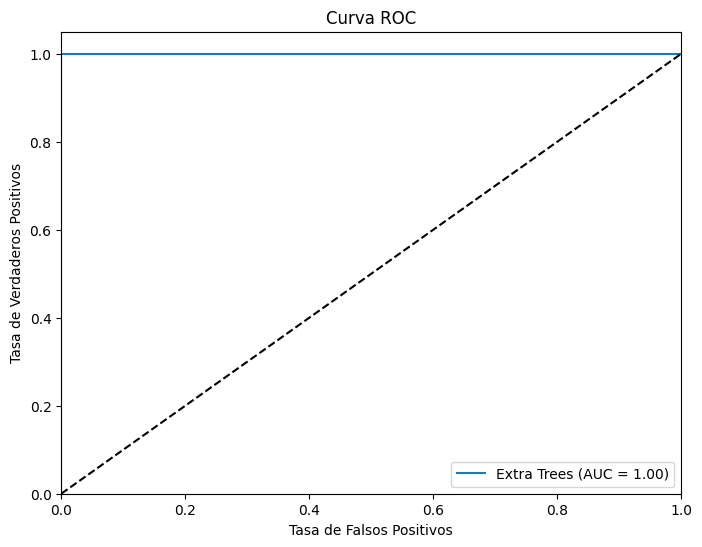

AUC de SVC (mejor modelo): 1.00
AUC de Random Forest (mejor modelo): 1.00
AUC de Extra Trees (mejor modelo): 1.00


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Función para mostrar la curva ROC y AUC
def plot_roc_curve(fpr, tpr, auc, label):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

test_df["class"] = test_df["class"].map({'Negative': 0, 'Positive': 1})


# Calcular y mostrar las curvas ROC y AUC para SVC (mejor modelo)
svc_best_pipeline.fit(train_df.drop("class", axis=1), train_df["class"])
svc_best_scores = svc_best_pipeline.decision_function(test_df.drop("class", axis=1))
fpr_svc, tpr_svc, _ = roc_curve(test_df["class"], svc_best_scores)
auc_svc = roc_auc_score(test_df["class"], svc_best_scores)

plot_roc_curve(fpr_svc, tpr_svc, auc_svc, 'SVC')

# Calcular y mostrar las curvas ROC y AUC para Random Forest (mejor modelo)
rf_best_model.fit(train_df.drop("class", axis=1), train_df["class"])
rf_best_scores = rf_best_model.predict_proba(test_df.drop("class", axis=1))[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(test_df["class"], rf_best_scores)
auc_rf = roc_auc_score(test_df["class"], rf_best_scores)

plot_roc_curve(fpr_rf, tpr_rf, auc_rf, 'Random Forest')

# Calcular y mostrar las curvas ROC y AUC para Extra Trees (mejor modelo)
et_best_model.fit(train_df.drop("class", axis=1), train_df["class"])
et_best_scores = et_best_model.predict_proba(test_df.drop("class", axis=1))[:, 1]
fpr_et, tpr_et, _ = roc_curve(test_df["class"], et_best_scores)
auc_et = roc_auc_score(test_df["class"], et_best_scores)

plot_roc_curve(fpr_et, tpr_et, auc_et, 'Extra Trees')

print(f"AUC de SVC (mejor modelo): {auc_svc:.2f}")
print(f"AUC de Random Forest (mejor modelo): {auc_rf:.2f}")
print(f"AUC de Extra Trees (mejor modelo): {auc_et:.2f}")


In [ ]:
"""
import joblib

joblib.dump(svc_best_pipeline, 'SVC_best_model.pkl')
"""

"\nimport joblib\n\njoblib.dump(svc_best_pipeline, 'SVC_best_model.pkl')\n"